# Initialisation

In [381]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from string import punctuation
from random import randint
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [382]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
stopwords_en = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maximer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/maximer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/maximer/nltk_data...


In [383]:
print(len(stopwords_en),stopwords_en)

179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [384]:
df = pd.read_csv('src/emotions.csv')

<Axes: >

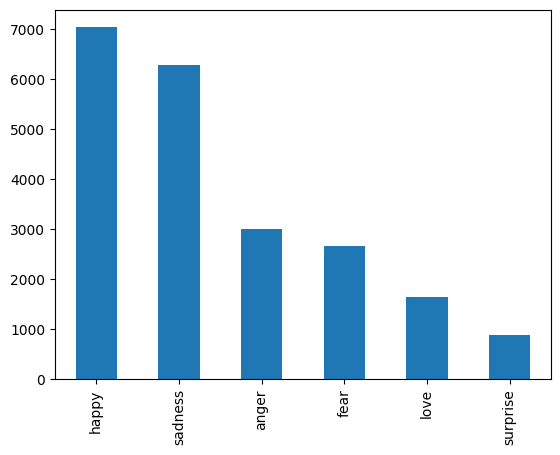

In [385]:
df.Emotion.value_counts().plot.bar()

In [386]:
rand = randint(0,1000)
example_sentence = df.loc[rand,"Text"]
example_emotion = df.loc[rand, "Emotion"]
example_sentence, example_emotion

('i have admitted defeat and asked the other half to come back from the lake coz i just feel so uptight already',
 'fear')

In [387]:
def clean_tokenize(sentence):
    tokens = word_tokenize(sentence)
    final = []
    for t in tokens:
        t=t.lower()
        if t not in stopwords_en and t not in punctuation:
            t = WordNetLemmatizer().lemmatize(t)
            final.append(t)
    return final


In [388]:
df["Tokens"] = df["Text"].apply(clean_tokenize)

In [389]:
df.head()

,Text,Emotion,Tokens
0,i didnt feel humiliated,sadness,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,"[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,"[feeling, grouchy]"


In [390]:
df_gb = df.groupby(by="Emotion")

In [391]:
most_commons = {}

for emotion, group in df_gb:
    # Liste les listes de tokens selon "Emotion"
    tokens_list = group['Tokens'].tolist()

    # Crée une seule grande liste contenant tous les mots pour chaque emotion
    all_tokens = [token for sublist in tokens_list for token in sublist]

    #Compte les mots et repertorie les 30 + utilisés
    word_counts = Counter(all_tokens)
    most_common_words = word_counts.most_common(30)

    # Range dans un dictionnaire qui prend l'emotion en clé et qui stocke une liste de 30 tuples
    # pour les 30 mots les + utilisés et leur fréquence
    most_commons[emotion] = most_common_words

In [392]:
vectorizer_bow = CountVectorizer()
data_bow = vectorizer_bow.fit_transform(df['Tokens'].apply(lambda x: ' '.join(x)))

In [393]:
vectorizer_tfidf = TfidfVectorizer()
data_tfidf = vectorizer_tfidf.fit_transform(df['Tokens'].apply(lambda x: ' '.join(x)))

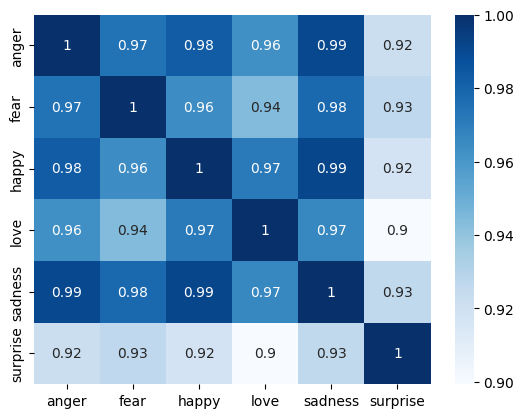

In [394]:
emotion_vectors = {}
for emotion, words in most_commons.items():
    emotion_vectors[emotion] = np.zeros(len(vectorizer_tfidf.get_feature_names_out()))
    for word, count in words:
        if word in vectorizer_tfidf.vocabulary_:
            index = vectorizer_tfidf.vocabulary_[word]
            emotion_vectors[emotion][index] = count

emotion_similarity = cosine_similarity(list(emotion_vectors.values()))

sns.heatmap(emotion_similarity, xticklabels=emotion_vectors.keys(), yticklabels=emotion_vectors.keys(), annot=True, cmap='Blues')
plt.show()